# Milestone 1: Feature Engineering & Selection

This milestone focuses on preparing and selecting relevant features from the dataset. It includes:
- Exploratory Data Analysis (EDA)
- Handling missing values
- Outlier detection and decision-making
- Initial feature engineering or transformation


# Task 1: Data Exploration & Analysis

In [1]:
# Import necessary libraries
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("train.csv")  # Make sure this file is in the same folder as your notebook

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


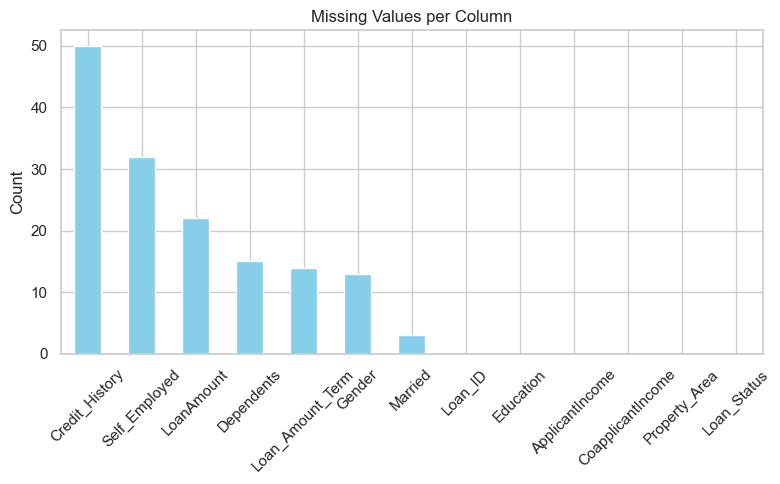

In [2]:
# Plot: Bar chart for missing values
plt.figure(figsize=(8, 5))
df.isnull().sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


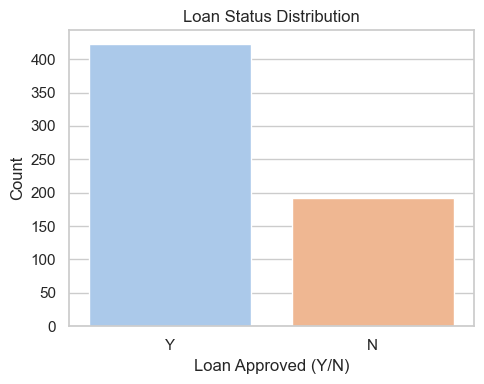

In [3]:
# Plot: Count plot for Loan_Status
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Loan_Status', hue='Loan_Status', palette='pastel', legend=False)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Approved (Y/N)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


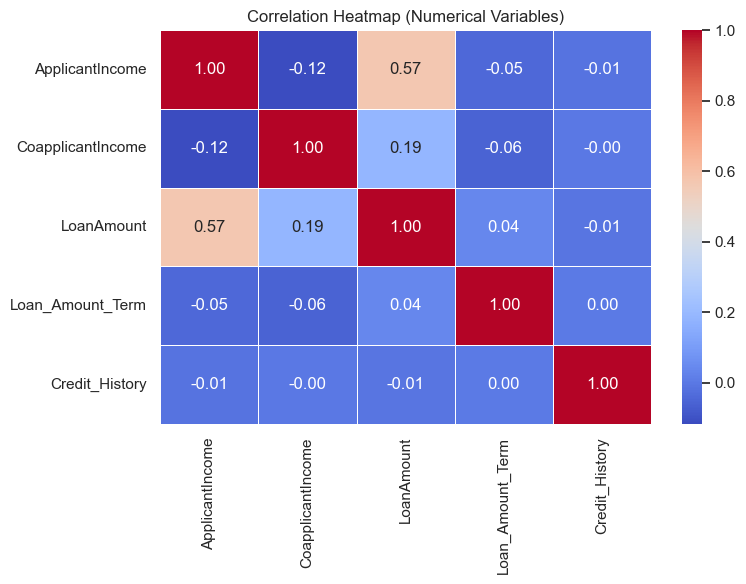

In [4]:
# Plot: Correlation heatmap for numeric columns only
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Variables)")
plt.tight_layout()
plt.show()


/var/folders/5n/cfj01_ss3dsfvv2sbdfc2ff00000gn/T/ipykernel_50576/2009288044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome', palette='Set2')


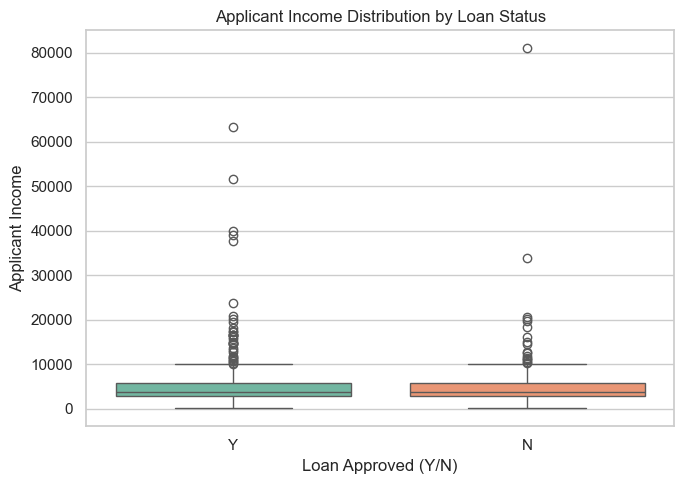

In [5]:
# Boxplot: ApplicantIncome by Loan_Status
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome', palette='Set2')
plt.title('Applicant Income Distribution by Loan Status')
plt.xlabel('Loan Approved (Y/N)')
plt.ylabel('Applicant Income')
plt.tight_layout()
plt.show()


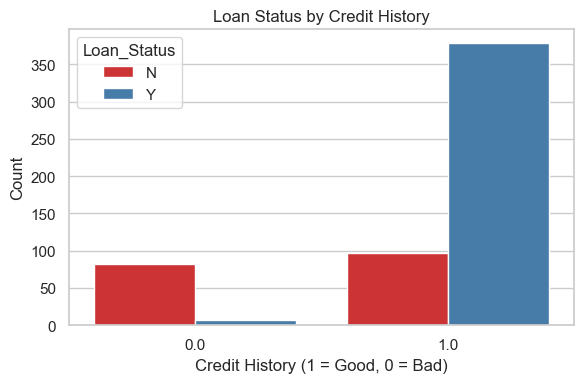

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Credit_History', hue='Loan_Status', palette='Set1')
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History (1 = Good, 0 = Bad)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


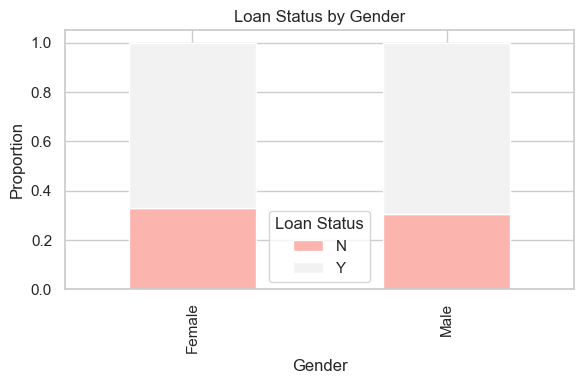

In [7]:
# Create a crosstab
gender_ct = pd.crosstab(df['Gender'], df['Loan_Status'])

# Normalize to get proportions
gender_ct_norm = gender_ct.div(gender_ct.sum(axis=1), axis=0)

# Plot
gender_ct_norm.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(6, 4))
plt.title("Loan Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()


In [8]:
# Check missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values per column:\n", missing)


Missing values per column:
 Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64


In [9]:
# Fill missing values
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

# Confirm no missing values
print("Remaining missing values:\n", df.isnull().sum().sum())

Remaining missing values:
 0


/var/folders/5n/cfj01_ss3dsfvv2sbdfc2ff00000gn/T/ipykernel_50576/1969643049.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
/var/folders/5n/cfj01_ss3dsfvv2sbdfc2ff00000gn/T/ipykernel_50576/1969643049.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

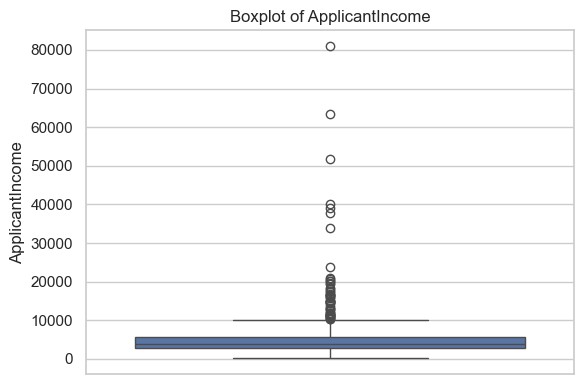

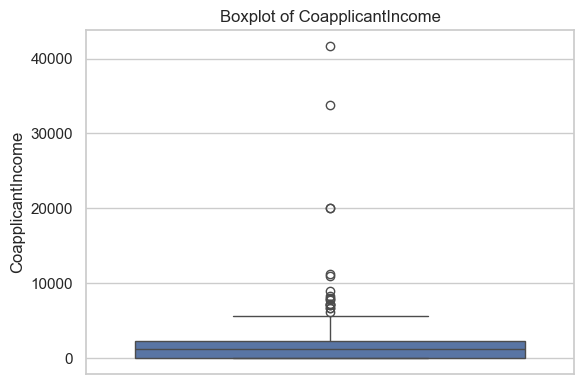

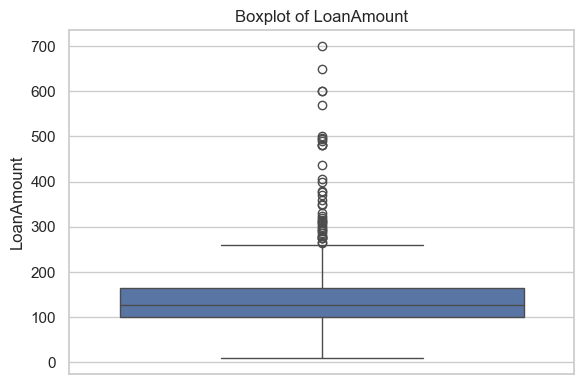

In [10]:
# List of numerical columns to check
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Create boxplots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [11]:
# IQR outlier detection function
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# Apply to relevant columns
for col in num_cols:
    detect_outliers(df, col)


ApplicantIncome: 50 outliers
CoapplicantIncome: 18 outliers
LoanAmount: 41 outliers


We identified outliers using the IQR (Interquartile Range) method in the following columns:

- ApplicantIncome: 50 outliers  
- CoapplicantIncome: 18 outliers  
- LoanAmount: 41 outliers  

Given the small size of the dataset and the scope of this project, we chose **not to remove or cap the outliers**. This decision helps preserve the data distribution and avoids unnecessary data loss.


# Task 2: Feature Engineering

In [12]:
# Combine applicant and co-applicant income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [13]:
import numpy as np
# Apply log transformation to reduce skewness
df['Log_LoanAmount'] = np.log1p(df['LoanAmount'])  # log1p handles 0 safely


In [14]:
df['Log_Total_Income'] = np.log1p(df['Total_Income'])

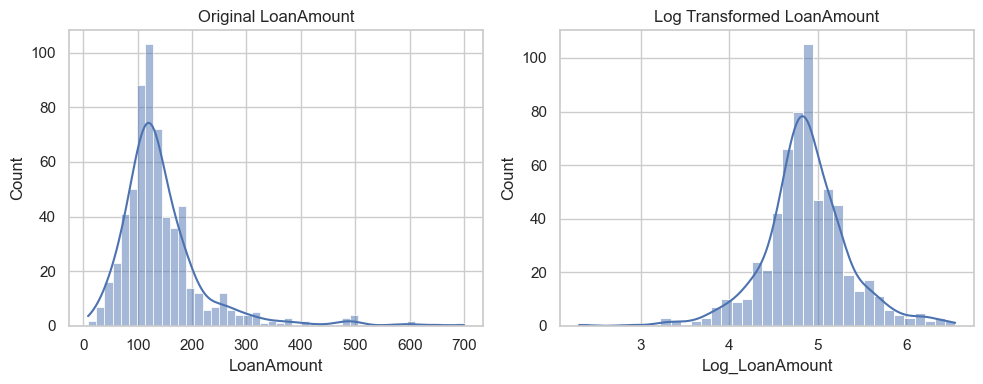

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before and After Log LoanAmount
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Original LoanAmount')

plt.subplot(1,2,2)
sns.histplot(df['Log_LoanAmount'], kde=True)
plt.title('Log Transformed LoanAmount')

plt.tight_layout()
plt.show()


In [16]:
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Graduate': 1, 'Not Graduate': 0})


In [17]:
df = pd.get_dummies(df, columns=['Property_Area', 'Dependents'], drop_first=True)


In [18]:
# Label Encoding for binary categories
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})


In [19]:
print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Total_Income',
       'Log_LoanAmount', 'Log_Total_Income', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   0 non-null      float64
 2   Married                  0 non-null      float64
 3   Education                0 non-null      float64
 4   Self_Employed            0 non-null      float64
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    object 
 11  Total_Income             614 non-null    float64
 12  Log_LoanAmount           614 non-null    float64
 13  Log_Total_Income         614 non-null    float64
 14  Property_Area_Semiurban  6

In [21]:
df.drop('Loan_ID', axis=1, inplace=True)

In [22]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   0 non-null      float64
 1   Married                  0 non-null      float64
 2   Education                0 non-null      float64
 3   Self_Employed            0 non-null      float64
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Total_Income             614 non-null    float64
 11  Log_LoanAmount           614 non-null    float64
 12  Log_Total_Income         614 non-null    float64
 13  Property_Area_Semiurban  614 non-null    bool   
 14  Property_Area_Urban      6

# Task 3: Feature Selection

In [24]:
# Compute correlation with target
correlation = df.corr(numeric_only=True)
correlation['Loan_Status'].sort_values(ascending=False)

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Dependents_2               0.062384
Log_Total_Income           0.007232
ApplicantIncome           -0.004710
Loan_Amount_Term          -0.022549
Dependents_3+             -0.026123
Total_Income              -0.031271
LoanAmount                -0.033214
Log_LoanAmount            -0.038242
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Gender                          NaN
Married                         NaN
Education                       NaN
Self_Employed                   NaN
Name: Loan_Status, dtype: float64

In [25]:
selected_features = [
    'Credit_History',
    'Property_Area_Semiurban',
    'Loan_Status'  # Target
]

In [26]:
# Select only important features (including target)
final_df = df[['Credit_History', 'Property_Area_Semiurban', 'Loan_Status']]

In [27]:
print(final_df.shape)
final_df.head()

(614, 3)


,Credit_History,Property_Area_Semiurban,Loan_Status
0,1.0,False,1
1,1.0,False,0
2,1.0,False,1
3,1.0,False,1
4,1.0,False,1


# Milestone 2: Model Enhancement & Tuning


# Task 1: Hyperparameter Tuning

In [28]:
!pip install scikit-learn

In [30]:
X = final_df.drop('Loan_Status', axis=1)
y = final_df['Loan_Status']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define model and hyperparameter grid
model = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],            # Regularization strength
    'solver': ['liblinear', 'lbfgs']         # Solvers
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model and its parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV Accuracy):", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Score (CV Accuracy): 0.8145949288806431


# Task 2: Cross-Validation & Regularization

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# L1 Regularization
l1_model = LogisticRegression(penalty='l1', solver='liblinear')
l1_score = cross_val_score(l1_model, X_train, y_train, cv=5).mean()

# L2 Regularization
l2_model = LogisticRegression(penalty='l2', solver='liblinear')
l2_score = cross_val_score(l2_model, X_train, y_train, cv=5).mean()

print(f"L1 CV Score: {l1_score}")
print(f"L2 CV Score: {l2_score}")


L1 CV Score: 0.8145949288806431
L2 CV Score: 0.8145949288806431


# Task 3: Model Architecture Adjustments

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Accuracy on test set
rf_accuracy = rf.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy}")


Random Forest Accuracy: 0.7886178861788617


In [36]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Accuracy on test set
dt_accuracy = dt.score(X_test, y_test)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.7886178861788617


# Milestone 3: Model Evaluation & Deployment Readiness

# Task 1: Deployment Pipeline Setup 

In [37]:
import joblib

# Save the model
joblib.dump(rf, 'loan_model.pkl')

# Load the model (simulate deployment usage)
loaded_model = joblib.load('loan_model.pkl')

# Predict on test set
predictions = loaded_model.predict(X_test)


# Task 2: Stress Testing & Validation

In [38]:
import numpy as np

# Create edge case test samples
edge_case = np.array([[0.0, True]])  # no credit history, semiurban
print("Prediction for edge case:", loaded_model.predict(edge_case))

Prediction for edge case: [0]


/Users/sonulama/webcam/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Task 3: Performance Evaluation

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

